In [193]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [195]:
df = pd.read_csv('generate_data.csv', parse_dates=["ds"])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds', inplace=True)

In [197]:
df.head()

,y
ds,
2022-12-31 23:45:00,11
2022-12-31 23:30:00,14
2022-12-31 23:15:00,16
2022-12-31 23:00:00,14
2022-12-31 22:45:00,21


In [199]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [201]:
def criar_sequencias(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = criar_sequencias(scaled_data, seq_length)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [203]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (28008, 30, 1)
X_test shape:  (7002, 30, 1)
y_train shape:  (28008, 1)
y_test shape:  (7002, 1)


In [205]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\rafae\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - loss: 0.0551
Epoch 2/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 68s 78ms/step - loss: 0.0198
Epoch 3/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 69s 79ms/step - loss: 0.0162
Epoch 4/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 66s 75ms/step - loss: 0.0148
Epoch 5/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 93s 106ms/step - loss: 0.0137
Epoch 6/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 99s 113ms/step - loss: 0.0126
Epoch 7/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 52s 59ms/step - loss: 0.0125
Epoch 8/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - loss: 0.0117
Epoch 9/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 65s 75ms/step - loss: 0.0119
Epoch 10/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 59s 68ms/step - loss: 0.0114
Epoch 11/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 67s 77ms/step - loss: 0.0112
Epoch 12/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 109s 125ms/step - loss: 0.0109
Epoch 13/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 96s 110ms/step - loss: 0.0107
Epoch 14/30
876/876 ━━━━━━━━━━━━━━━━━━━━ 101s 115ms/step - loss: 0.0106
Epoch 15/30
876/876 ━━

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


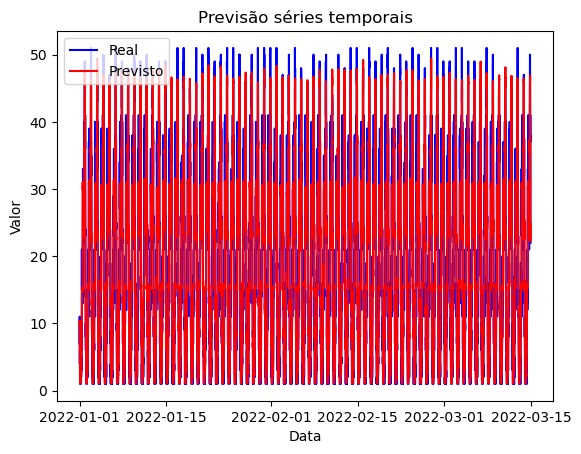

In [178]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='blue', label='Real')
plt.plot(df.index[-len(y_test):], predicted, color='red', label='Previsto')
plt.title('Previsão séries temporais')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()